<strong>Дана задача Коши для линейного дифференциального уравнения первого порядка.
    
A. Найти точное решение задачи Коши.

B. Преобразовать задачу Коши к интегральному уравнению Вольтерры и методом
простых итераций найти несколько первых приближений к точному решению.
Проиллюстрировать графически сходимость приближенных решений к
точному</strong>

$x^{'} + x = t \sin(t), x(0) = -2$

<i>A. Найдем точное решение задачи Коши (1).</i>

Линейное дифференциальное уравнение 1-го порядка может быть решено методом Бернулли или методом вариации произвольной постоянной:

In [1]:
import sympy as sp
from IPython.display import display, Latex

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')
x = sp.Symbol('x')

x = sp.Function('x')
eq = -x(t).diff(t) - x(t) + t*sp.sin(t)
display(Latex("Дифференциальное уравнение первого порядка:"))
display(eq)
solution = sp.dsolve(eq, x(t), hint='Bernoulli')

display(Latex("Решение дифференциального уравнение первого порядка, решенное методом Бернулли:"))
display(solution)

<IPython.core.display.Latex object>

                  d       
t⋅sin(t) - x(t) - ──(x(t))
                  dt      

<IPython.core.display.Latex object>

       ⎛        t             t           t       ⎞    
       ⎜     t⋅ℯ ⋅sin(t)   t⋅ℯ ⋅cos(t)   ℯ ⋅cos(t)⎟  -t
x(t) = ⎜C₁ + ─────────── - ─────────── + ─────────⎟⋅ℯ  
       ⎝          2             2            2    ⎠    

In [2]:
display(solution.subs(t, 0))

x(0) = C₁ + 1/2

Следовательно, $x{\left (t \right )} = \left(- \frac{5}{2} + \frac{t e^{t}}{2} \sin{\left (t \right )} - \frac{t e^{t}}{2} \cos{\left (t \right )} + \frac{e^{t}}{2} \cos{\left (t \right )}\right) e^{- t}$

<i>B. Преобразуем задачу Коши $x^{'} + x = t \sin(t)$ к интегральному уравнению Вольтерры и применим к нему метод простых итераций для нахождения приближенных решений.</i>

Задача Коши (1) равносильна интегральному уравнению Вольтерры

$$x(t) = -2 + {\int_0^t{\mathrm{(s \sin(s) - x(s))}\,\mathrm{d}s}}$$

In [3]:
s = sp.Symbol('s')

exact_func = (-sp.Rational(5, 2) + t*sp.exp(t)*sp.sin(t)/2 
              - t*sp.exp(t)*sp.cos(t)/2 + sp.exp(t)*sp.cos(t)/2)*sp.exp(-t)

expr = s*sp.sin(s)
display(sp.integrate(expr, (s, 0, t)))

-t⋅cos(t) + sin(t)

После упрощения получаем уравнение следующего вида:
$$x(t) = - {\int_0^t{\mathrm{x(s)}\,\mathrm{d}s}} -2 - t \cos{\left (t \right )} + \sin{\left (t \right )} \Leftrightarrow Ф[x] = x$$

К интегральному уравнению Вольтерры может быть применен метод простых итераций. Для произвольного начального приближения $x_0$ последовательность итераций задается рекуррентной формулой $x_n = Ф[x_{n - 1}]$. В данном случае
$$x_n(t) = - {\int_0^t{\mathrm{x_{n - 1}(s)}\,\mathrm{d}s}} -2 - t \cos{\left (t \right )} + \sin{\left (t \right )}$$

Выберем произольным образом начальное приближение, например $x_0(t) = t$.

На каждом из рисунков изображены график точного решения x (синий)и график одного из приближений $x_n$ (зеленый).

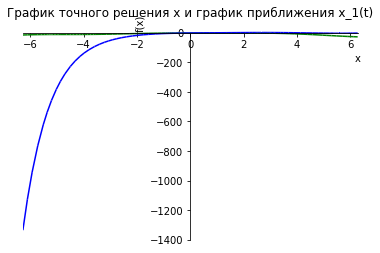

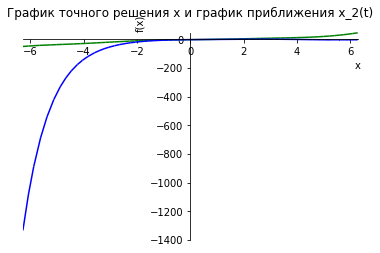

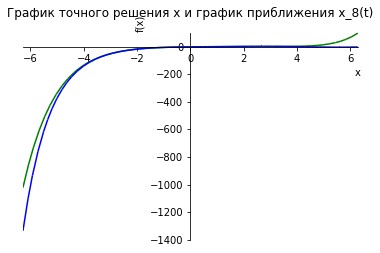

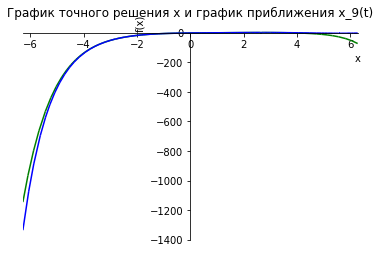

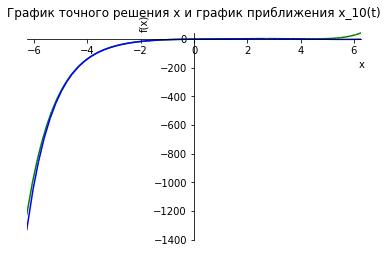

In [4]:
from IPython.display import display
x_next = t

for i in range(1, 11):
    x_next = (-1)*sp.integrate(x_next.subs(t, s), (s, 0, t)) - t*sp.cos(t) + sp.sin(t) - 2
    if i <= 2 or i > 7:
        p = sp.plot((x_next, (t, -2*sp.pi, 2*sp.pi)), (exact_func, ((t, -2*sp.pi, 2*sp.pi))),
                    show=False, title='График точного решения x и график приближения x_' + str(i) + '(t)')
        p[0].line_color = 'green'
        p[1].line_color = 'blue'
        p.show()

Промежуток $[-2\pi; 2\pi]$ для построения графиков и порядки приближений выбраны так, чтобы наиболее наглядно проявилась сходимость приближенных решений к точному решению.